In [1]:
import pandas as pd
import os
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow import keras
from copy import deepcopy
import matplotlib.pyplot as plt
import numpy as np

from itertools import product

fp_local = '/home/jovyan/docker/src/python/temp_test/DJGrad'
fp_data = os.path.join(fp_local, 'data')

In [2]:
wine_df = pd.read_csv(os.path.join(fp_data,'winequality-red.csv'),delimiter=';')
wine_df = wine_df.append(pd.read_csv(os.path.join(fp_data,'winequality-white.csv'),delimiter=';'))
wine_df = wine_df.sample(frac=1)

In [3]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2121,7.7,0.390,0.28,4.9,0.035,36.0,109.0,0.99180,3.19,0.58,12.2,7
1073,8.0,0.620,0.33,2.7,0.088,16.0,37.0,0.99720,3.31,0.58,10.7,6
613,7.5,0.210,0.68,10.9,0.045,38.0,133.0,0.99780,3.00,0.36,8.7,5
2124,7.7,0.390,0.28,4.9,0.035,36.0,109.0,0.99180,3.19,0.58,12.2,7
4165,6.6,0.220,0.35,1.4,0.050,23.0,83.0,0.99019,3.17,0.48,12.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1325,6.7,0.460,0.24,1.7,0.077,18.0,34.0,0.99480,3.39,0.60,10.6,6
361,7.1,0.365,0.14,1.2,0.055,24.0,84.0,0.99410,3.15,0.43,8.9,5
3902,6.1,0.220,0.38,2.8,0.144,12.0,65.0,0.99080,2.95,0.64,11.4,6
4300,6.4,0.290,0.30,6.5,0.209,62.0,156.0,0.99478,3.10,0.40,9.4,5


/root/anaconda/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

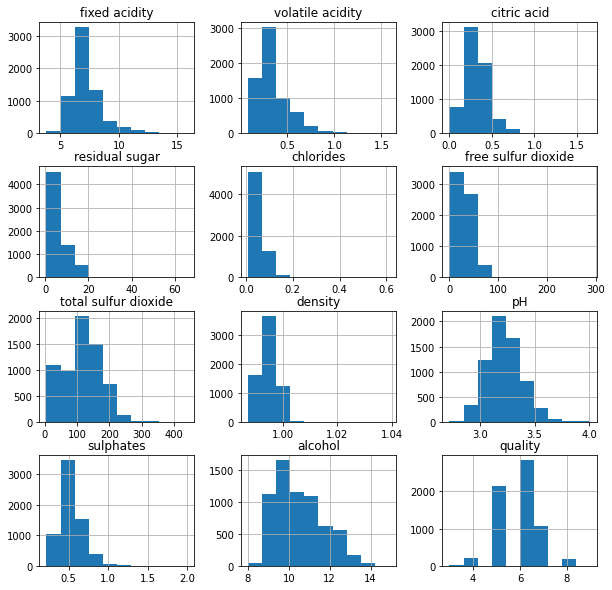

In [4]:
wine_df.hist(figsize=(10,10))

In [5]:
quants = wine_df['alcohol'].quantile([0,0.25, 0.5,0.75,1.0]).to_numpy()
res = []
for q1, q2 in zip(quants[:-1],quants[1:]):
    res.append(wine_df.loc[(wine_df['alcohol']>=q1) & (wine_df['alcohol']<q2)])
    
train_dfs = [q.sample(frac=0.8) for q in res]
test_dfs = [q.drop(t.index) for q,t in zip(res,train_dfs)]

In [6]:
fp_datamodel = Sequential([
    layers.Dense(64, activation='sigmoid', input_shape=(11,)),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(16, activation='sigmoid'),
    layers.Dense(1, 'linear')
])

fp_datamodel.compile(
    optimizer='adam',
    loss=tf.keras.losses.MeanSquaredError(
    ),
#     metrics=[CWAcc1(n,name=f'cl{n}') for n in range(10)]
)

In [47]:
%%time

history = fp_datamodel.fit(
    train_dfs[0].drop('quality',axis=1).to_numpy(),
    train_dfs[0]['quality'].to_numpy(),
    epochs=300,
    validation_split=0.2,
)

Epoch 1/300
31/31 [==============================] - 0s 1ms/step - loss: 0.3978 - val_loss: 0.4597
Epoch 2/300
31/31 [==============================] - 0s 810us/step - loss: 0.4001 - val_loss: 0.5037
Epoch 3/300
31/31 [==============================] - 0s 738us/step - loss: 0.4095 - val_loss: 0.4330
Epoch 4/300
31/31 [==============================] - 0s 732us/step - loss: 0.4229 - val_loss: 0.4464
Epoch 5/300
31/31 [==============================] - 0s 706us/step - loss: 0.3875 - val_loss: 0.4382
Epoch 6/300
31/31 [==============================] - 0s 760us/step - loss: 0.3945 - val_loss: 0.4414
Epoch 7/300
31/31 [==============================] - 0s 774us/step - loss: 0.3889 - val_loss: 0.4328
Epoch 8/300
31/31 [==============================] - 0s 744us/step - loss: 0.3832 - val_loss: 0.4353
Epoch 9/300
31/31 [==============================] - 0s 726us/step - loss: 0.3844 - val_loss: 0.4332
Epoch 10/300
31/31 [==============================] - 0s 721us/step - loss: 0.3860 - val_loss

31/31 [==============================] - 0s 816us/step - loss: 0.3753 - val_loss: 0.4221
Epoch 82/300
31/31 [==============================] - 0s 799us/step - loss: 0.3866 - val_loss: 0.4237
Epoch 83/300
31/31 [==============================] - 0s 711us/step - loss: 0.3767 - val_loss: 0.4290
Epoch 84/300
31/31 [==============================] - 0s 726us/step - loss: 0.3694 - val_loss: 0.4244
Epoch 85/300
31/31 [==============================] - 0s 800us/step - loss: 0.3691 - val_loss: 0.4210
Epoch 86/300
31/31 [==============================] - 0s 830us/step - loss: 0.3746 - val_loss: 0.4234
Epoch 87/300
31/31 [==============================] - 0s 788us/step - loss: 0.3661 - val_loss: 0.4166
Epoch 88/300
31/31 [==============================] - 0s 864us/step - loss: 0.3787 - val_loss: 0.4232
Epoch 89/300
31/31 [==============================] - 0s 770us/step - loss: 0.3748 - val_loss: 0.4241
Epoch 90/300
31/31 [==============================] - 0s 868us/step - loss: 0.3677 - val_loss: 

Epoch 161/300
31/31 [==============================] - 0s 849us/step - loss: 0.3998 - val_loss: 0.4307
Epoch 162/300
31/31 [==============================] - 0s 722us/step - loss: 0.3585 - val_loss: 0.4144
Epoch 163/300
31/31 [==============================] - 0s 713us/step - loss: 0.3673 - val_loss: 0.4180
Epoch 164/300
31/31 [==============================] - 0s 772us/step - loss: 0.3638 - val_loss: 0.4155
Epoch 165/300
31/31 [==============================] - 0s 800us/step - loss: 0.3538 - val_loss: 0.4320
Epoch 166/300
31/31 [==============================] - 0s 717us/step - loss: 0.3564 - val_loss: 0.4134
Epoch 167/300
31/31 [==============================] - 0s 702us/step - loss: 0.3610 - val_loss: 0.4173
Epoch 168/300
31/31 [==============================] - 0s 754us/step - loss: 0.3634 - val_loss: 0.4327
Epoch 169/300
31/31 [==============================] - 0s 767us/step - loss: 0.3547 - val_loss: 0.4241
Epoch 170/300
31/31 [==============================] - 0s 770us/step - lo

31/31 [==============================] - 0s 811us/step - loss: 0.3556 - val_loss: 0.4177
Epoch 241/300
31/31 [==============================] - 0s 749us/step - loss: 0.3540 - val_loss: 0.4254
Epoch 242/300
31/31 [==============================] - 0s 736us/step - loss: 0.3507 - val_loss: 0.4431
Epoch 243/300
31/31 [==============================] - 0s 801us/step - loss: 0.3510 - val_loss: 0.4162
Epoch 244/300
31/31 [==============================] - 0s 830us/step - loss: 0.3637 - val_loss: 0.4404
Epoch 245/300
31/31 [==============================] - 0s 722us/step - loss: 0.3541 - val_loss: 0.4242
Epoch 246/300
31/31 [==============================] - 0s 710us/step - loss: 0.3418 - val_loss: 0.4482
Epoch 247/300
31/31 [==============================] - 0s 793us/step - loss: 0.3529 - val_loss: 0.4261
Epoch 248/300
31/31 [==============================] - 0s 796us/step - loss: 0.3676 - val_loss: 0.4290
Epoch 249/300
31/31 [==============================] - 0s 729us/step - loss: 0.3537 - v

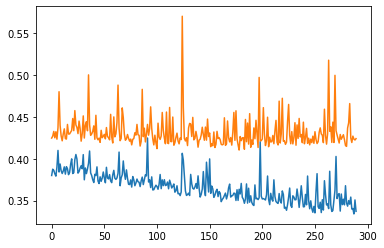

In [48]:
plt.plot(history.history['loss'][10:])
plt.plot(history.history['val_loss'][10:])

plt.show()

In [69]:
pred = fp_datamodel.predict(test_dfs[-1].drop('quality',axis=1).to_numpy())
print(np.mean(np.square(pred.flatten() - test_dfs[-1]['quality'].to_numpy().flatten())))
print(np.mean(np.square(test_dfs[0]['quality'].mean() - test_dfs[-1]['quality'].to_numpy().flatten())))

0.8150286108644117
1.58125


In [68]:
pred = fp_datamodel.predict(test_dfs[0].drop('quality',axis=1).to_numpy())
print(np.mean(np.square(pred.flatten() - test_dfs[0]['quality'].to_numpy().flatten())))
print(np.mean(np.square(test_dfs[0]['quality'].mean() - test_dfs[0]['quality'].to_numpy().flatten())))

0.36627927928501364
0.6231343283582089


---

In [7]:
class CWAcc1(tf.keras.metrics.Metric):
    def __init__(self, class_idx, name='classwise_accuracy1', num_classes=10, **kwargs):
        super(CWAcc1, self).__init__(name=name, **kwargs)
        self.num_classes = num_classes
        self.class_idx = class_idx
        self.num_correct = self.add_weight(name='num_correct',initializer='zeros')
        self.num_samples = self.add_weight(name='num_samples',initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.reshape(tf.cast(y_true, tf.int16),(1,-1))
        y_pred = tf.reshape(tf.cast(tf.argmax(y_pred,axis=1), tf.int16),(1,-1))
                
        count_correct = tf.math.reduce_sum(tf.cast(tf.math.logical_and(
            tf.equal(y_true,y_pred),
            tf.equal(y_true,tf.math.multiply(tf.ones_like(y_true),self.class_idx))
        ),dtype=tf.float32))
        
        count_class = tf.math.reduce_sum(tf.cast(
            tf.equal(y_true,tf.math.multiply(tf.ones_like(y_true),self.class_idx)),
            dtype=tf.float32
        ))
        
        self.num_correct.assign_add(count_correct)
        self.num_samples.assign_add(count_class)

    def result(self):
        return tf.math.divide_no_nan(self.num_correct,self.num_samples)

In [8]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [9]:
def gen_mask(grads):
    mask = []
    for g in grads:
        size = g.shape[0]
        m = 2
        assert m%1==0

        split = tf.concat([tf.ones(size//m)*i for i in range(m)],0)
        split = tf.random.shuffle(split)
        mask.append(tf.reshape(split,(1,-1)))

    return mask

grads = [tf.random.uniform(((x+1)*2,)) for x in range(10)]

res = gen_mask(grads)
tf.math.multiply(res[2],grads[2])

<tf.Tensor: shape=(1, 6), dtype=float32, numpy=
array([[0.99887776, 0.9715092 , 0.        , 0.        , 0.        ,
        0.62598205]], dtype=float32)>

In [10]:
import hashlib
import random

class Car():
    def __init__(self,neighbors,p=1.0):
        self.neighbors = neighbors
        self.fwd_q = []
        self.rec_grad = set()
        self.new_grad = []
        self.p = p
        
    def forward(self,lst_cars,):
        for n,c in enumerate(lst_cars):
            if n in self.neighbors:
                for grad in self.fwd_q:
                    if self.p < random.random():
                        c.receive(grad)
                    
    def _hash(self,data):
        bts = str(data).encode('utf-8')#tf.io.serialize_tensor(grad)
        return hashlib.sha256(bts).digest()
    
    def _mark_seen(self,data,hash=False):
        tmp = self._hash(data) if hash else data
        self.rec_grad.add(tmp)
        
    def already_rec(self,grad,):
        hashed = self._hash(grad)
        
        if hashed in self.rec_grad:
            return (True,hashed)
        else:
            return (False,hashed)
        
    def apply_grad(self,grad,hashed,target,):
        self._mark_seen(hashed)
        return [tf.math.add(t,g) for t,g in zip(target,grad)]
    
    def apply_grads(self,target,):
        self.fwd_q=[]
        for g in self.new_grad:
            bl,hashed = self.already_rec(g)
            if not bl:
                target = self.apply_grad(g,hashed,target)
                self.fwd_q.append(g)
        self.new_grad=[]
        return target
    
    def receive(self,grad,):
        self.new_grad.append(grad)
        
    def load(self,grad,):
        self.fwd_q.append(grad)

In [33]:
from tensorflow import keras
from copy import deepcopy
import tensorflow.experimental.numpy as tnp
from sklearn.metrics import confusion_matrix

def cw_acc(y_true,y_pred):
    y_pred = np.argmax(y_pred,axis=1)
    matrix = confusion_matrix(y_true, y_pred)
    return matrix.diagonal()/matrix.sum(axis=1)

def gen_mask(grads,m=2):
    mask = []
    for g in grads:
        size = g.shape[-1]
        assert m%1==0

        split = tf.concat([tf.ones(size//m)*i for i in range(m)],0)
        split = tf.random.shuffle(split)
        mask.append(tf.reshape(split,(1,-1)))

    return mask

class DistMLP(keras.Model):
    def __init__(self,mode='none',p=1.0):
        super(DistMLP, self).__init__()
        self.mod1 = Sequential([
            layers.Dense(64, activation='sigmoid', input_shape=(11,)),
            layers.Dense(32, activation='sigmoid'),
            layers.Dense(16, activation='sigmoid'),
            layers.Dense(1, 'linear')
        ])
        
        self.mod2 = tf.keras.models.clone_model(self.mod1)
        self.mod3 = tf.keras.models.clone_model(self.mod1)
        self.mod4 = tf.keras.models.clone_model(self.mod1)
        
        self.mode=mode
        
        self.cars = [Car([i%2,],p=p) for i in range(1,5)]
        self.gradients = []

    def call(self, data):
        return self.mod1(data)

    def train_step(self, data):
        x1,y1,x2,y2,x3,y3,x4,y4, = data
        with tf.GradientTape() as tape:
            y_pred1 = self.mod1(x1,training=True)
            y_pred2 = self.mod2(x2,training=True)
            y_pred3 = self.mod3(x3,training=True)
            y_pred4 = self.mod4(x4,training=True)
            loss1 = self.compiled_loss(y1,y_pred1)
            loss2 = self.compiled_loss(y2,y_pred2)
            loss3 = self.compiled_loss(y3,y_pred3)
            loss4 = self.compiled_loss(y4,y_pred4)

        grads = tape.gradient([loss1,loss2,loss3,loss4], self.trainable_weights)
        
        if self.mode=='none':
            self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        elif self.mode=='simple_add':
            temp = [tf.math.add_n([grads[n+i*(len(grads)//4)] for i in range(4)]) for n in range(len(grads)//4)]
            self.optimizer.apply_gradients(zip([*temp,*temp,*temp,*temp], self.trainable_weights))
        elif self.mode=='djgrad':
            grad_mask = [tf.reshape(m,(-1,)) if len(g.shape)==1 else m for m,g in zip(gen_mask(grads),grads)]
            masked_grads = [tf.math.multiply(g,m) for m,g in zip(grad_mask,grads)]
            new_grads = []
            
            for n,c in enumerate(self.cars):
                i1,i2 = (len(grads)//4)*n,(len(grads)//4)*(n+1)
                new_grads+=c.apply_grads(grads[i1:i2])
                c.load(masked_grads[i1:i2])
                c._mark_seen(masked_grads[i1:i2],True)
                c.forward(self.cars)
                 
            self.optimizer.apply_gradients(zip(
                [tf.math.add(g,n) for g,n in zip(grads,new_grads)],
                self.trainable_weights))
        
        # Need a metric that gives accuracy for each model individually
        for m in self.compiled_metrics._user_metrics:
            m.update_state(tf.concat([y1,y2,y3,y4],0), tf.concat([y_pred1,y_pred2,y_pred3,y_pred4],0),source_array=tf.concat([x1[:,-1],x2[:,-1],x3[:,-1],x4[:,-1]],0))

        return {m.name: m.result() for m in self.compiled_metrics._user_metrics}
    
    def test_step(self, data):
        x, y = data
        
        y_pred1 = self.mod1(x,training=False)
        y_pred2 = self.mod2(x,training=False)
        y_pred3 = self.mod3(x,training=False)
        y_pred4 = self.mod4(x,training=False)
                
        self.compiled_loss(tf.concat([y,y,y,y,],0),tf.concat([y_pred1,y_pred2,y_pred3,y_pred4],0))
        for m in self.compiled_metrics._user_metrics:
            m.update_state(tf.concat([y,y,y,y],0),tf.concat([y_pred1,y_pred2,y_pred3,y_pred4],0),source_array=tf.concat([x[:,-1],x[:,-1],x[:,-1],x[:,-1]],0))

        return {m.name: m.result() for m in self.compiled_metrics._user_metrics}
    
    def reset_metrics(self):
        for m in self.compiled_metrics._user_metrics:
            m.reset_state()
        for m in self.metrics:
            m.reset_state()

In [34]:
class CWMet(tf.keras.metrics.Metric):
    def __init__(self, car_idx, minmax, name='classwise_accuracy', num_cars=4, **kwargs):
        super(CWMet, self).__init__(name=name, **kwargs)
        self.num_cars = num_cars
        self.car_idx = car_idx
        self.minmax = minmax
        self.loss = self.add_weight(name='loss',initializer='zeros')
        self.num_samples = self.add_weight(name='num_samples',initializer='zeros')

    def update_state(self, y_true, y_pred, source_array=None, sample_weight=None):
        y_true = tf.reshape(y_true, (4,-1))[self.car_idx]
        y_pred = tf.reshape(y_pred, (4,-1))[self.car_idx]
        source_array = tf.reshape(source_array, (4,-1))[self.car_idx]

        bl_mask = tf.math.logical_and(
            tf.math.greater_equal(source_array, self.minmax[0]),
            tf.math.greater_equal(self.minmax[1],source_array),
        )
        
#         print(source_array)
#         print(y_true.shape,tf.boolean_mask(tf.cast(y_true, tf.float32), bl_mask).shape)
        
        y_true = tf.boolean_mask(tf.cast(y_true, tf.float32), bl_mask)
        y_pred = tf.boolean_mask(tf.cast(y_pred, tf.float32), bl_mask)
        
#         print(np.max(source_array),np.min(source_array),self.minmax,source_array.shape,y_true)
#         print(tf.math.greater_equal(self.minmax[0],source_array))
        
        loss = tf.math.reduce_sum(tf.math.square(y_true-y_pred))

        count_class = tf.math.reduce_sum(tf.cast(bl_mask,dtype=tf.float32))#tf.cast(y_true.get_shape().as_list()[0],dtype=tf.float32)
        
        self.loss.assign_add(loss)
        self.num_samples.assign_add(count_class)

    def result(self):
#         print(self.num_samples)
        return tf.math.divide_no_nan(self.loss,self.num_samples)

In [35]:
min_len = min([x.shape[0] for x in train_dfs])

train_dataset = tf.data.Dataset.from_tensor_slices((
    train_dfs[0].drop('quality',axis=1).to_numpy()[:min_len],
    train_dfs[0]['quality'].to_numpy()[:min_len],
    train_dfs[1].drop('quality',axis=1).to_numpy()[:min_len],
    train_dfs[1]['quality'].to_numpy()[:min_len],
    train_dfs[2].drop('quality',axis=1).to_numpy()[:min_len],
    train_dfs[2]['quality'].to_numpy()[:min_len],
    train_dfs[3].drop('quality',axis=1).to_numpy()[:min_len],
    train_dfs[3]['quality'].to_numpy()[:min_len],
)).shuffle(100).batch(128,True)


test_dataset = tf.data.Dataset.from_tensor_slices((
    np.concatenate((
        test_dfs[0].drop('quality',axis=1).to_numpy(),
        test_dfs[1].drop('quality',axis=1).to_numpy(),
        test_dfs[2].drop('quality',axis=1).to_numpy(),
        test_dfs[3].drop('quality',axis=1).to_numpy(),
    )),
    np.concatenate((
        test_dfs[0]['quality'].to_numpy(),
        test_dfs[1]['quality'].to_numpy(),
        test_dfs[2]['quality'].to_numpy(),
        test_dfs[3]['quality'].to_numpy(),
    ))
)).shuffle(100).batch(128,True)

In [37]:
%%time
tf.random.set_seed(0)

m = DistMLP('none')
m.compile(
    optimizer='adam',
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[CWMet(ca,(q1,q2),name=f'ca{ca+1}-[{q1},{q2})') for ca,(q1,q2) in product(range(4),zip(quants[:-1],quants[1:]))],
    run_eagerly=True
)


history = m.fit(
    train_dataset,
#     validation_split=0.2,
    epochs=100,
    validation_data=test_dataset
)

# with open(os.path.join(fp_local,'no_sharing.pickle'), 'wb') as handle:
#     pickle.dump(history.history, handle, protocol=pickle.HIGHEST_PROTOCOL)

Epoch 1/100
9/9 [==============================] - 1s 110ms/step - ca1-[8.0,9.5): 35.2956 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 24.9421 - ca2-[9.5,10.3): 25.9473 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 26.4618 - ca3-[10.3,11.3): 29.6708 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 33.8944 - ca4-[11.3,14.9): 36.5834 - val_ca1-[8.0,9.5): 31.5948 - val_ca1-[9.5,10.3): 33.0586 - val_ca1-[10.3,11.3): 37.3963 - val_ca1-[11.3,14.9): 43.5790 - val_ca2-[8.0,9.5): 22.6121 - val_ca2-[9.5,10.3): 23.7808 - val_ca2-[10.3,11.3): 27.5204 - val_ca2-[11.3,14.9): 32.8414 - val_ca3-[8.0,9.5): 21.5487 - val_ca3-[9.5,10.3): 22.7005 - val_ca3-[10.3,11.3): 26.3651 - val_ca3-[11.3,14.9): 31.5552 - val_ca4-[8.0,9.5): 23.0312 - val_ca4-[9.5,10.3): 24.2362 - val_ca4-[10.3,11.3): 27.9630 - val_ca4-[11.3,14.9): 33.2741
Epoc

9/9 [==============================] - 1s 112ms/step - ca1-[8.0,9.5): 13.7256 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 7.8405 - ca2-[9.5,10.3): 8.5234 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 6.6769 - ca3-[10.3,11.3): 8.2930 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 13.9281 - ca4-[11.3,14.9): 15.7979 - val_ca1-[8.0,9.5): 12.5500 - val_ca1-[9.5,10.3): 13.3984 - val_ca1-[10.3,11.3): 16.3647 - val_ca1-[11.3,14.9): 20.6709 - val_ca2-[8.0,9.5): 7.2625 - val_ca2-[9.5,10.3): 7.8641 - val_ca2-[10.3,11.3): 10.2082 - val_ca2-[11.3,14.9): 13.6106 - val_ca3-[8.0,9.5): 4.8800 - val_ca3-[9.5,10.3): 5.3285 - val_ca3-[10.3,11.3): 7.3116 - val_ca3-[11.3,14.9): 10.1831 - val_ca4-[8.0,9.5): 8.2429 - val_ca4-[9.5,10.3): 8.8917 - val_ca4-[10.3,11.3): 11.3537 - val_ca4-[11.3,14.9): 14.9427
Epoch 10/100
9/9 [=========

9/9 [==============================] - 1s 110ms/step - ca1-[8.0,9.5): 7.5381 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 2.9135 - ca2-[9.5,10.3): 3.3796 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 2.0199 - ca3-[10.3,11.3): 2.9702 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 7.2449 - ca4-[11.3,14.9): 8.4898 - val_ca1-[8.0,9.5): 6.9968 - val_ca1-[9.5,10.3): 7.5825 - val_ca1-[10.3,11.3): 9.9039 - val_ca1-[11.3,14.9): 13.2560 - val_ca2-[8.0,9.5): 2.8345 - val_ca2-[9.5,10.3): 3.1246 - val_ca2-[10.3,11.3): 4.7176 - val_ca2-[11.3,14.9): 7.0105 - val_ca3-[8.0,9.5): 1.4192 - val_ca3-[9.5,10.3): 1.5404 - val_ca3-[10.3,11.3): 2.7193 - val_ca3-[11.3,14.9): 4.4117 - val_ca4-[8.0,9.5): 3.5330 - val_ca4-[9.5,10.3): 3.8846 - val_ca4-[10.3,11.3): 5.6300 - val_ca4-[11.3,14.9): 8.1454
Epoch 18/100
9/9 [====================

9/9 [==============================] - 1s 112ms/step - ca1-[8.0,9.5): 4.7486 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 1.0813 - ca2-[9.5,10.3): 1.4011 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.8383 - ca3-[10.3,11.3): 1.4906 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 3.8542 - ca4-[11.3,14.9): 4.8244 - val_ca1-[8.0,9.5): 4.3962 - val_ca1-[9.5,10.3): 4.8151 - val_ca1-[10.3,11.3): 6.7077 - val_ca1-[11.3,14.9): 9.4529 - val_ca2-[8.0,9.5): 1.1786 - val_ca2-[9.5,10.3): 1.2588 - val_ca2-[10.3,11.3): 2.3330 - val_ca2-[11.3,14.9): 3.8663 - val_ca3-[8.0,9.5): 0.6843 - val_ca3-[9.5,10.3): 0.6351 - val_ca3-[10.3,11.3): 1.3972 - val_ca3-[11.3,14.9): 2.4687 - val_ca4-[8.0,9.5): 1.5438 - val_ca4-[9.5,10.3): 1.6835 - val_ca4-[10.3,11.3): 2.9015 - val_ca4-[11.3,14.9): 4.6482
Epoch 26/100
9/9 [=====================

9/9 [==============================] - 1s 112ms/step - ca1-[8.0,9.5): 3.0955 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.5344 - ca2-[9.5,10.3): 0.7490 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5315 - ca3-[10.3,11.3): 0.9803 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 2.0881 - ca4-[11.3,14.9): 2.7823 - val_ca1-[8.0,9.5): 2.8366 - val_ca1-[9.5,10.3): 3.1258 - val_ca1-[10.3,11.3): 4.7199 - val_ca1-[11.3,14.9): 6.9525 - val_ca2-[8.0,9.5): 0.6951 - val_ca2-[9.5,10.3): 0.6505 - val_ca2-[10.3,11.3): 1.4297 - val_ca2-[11.3,14.9): 2.4943 - val_ca3-[8.0,9.5): 0.5800 - val_ca3-[9.5,10.3): 0.4269 - val_ca3-[10.3,11.3): 0.9413 - val_ca3-[11.3,14.9): 1.6267 - val_ca4-[8.0,9.5): 0.7494 - val_ca4-[9.5,10.3): 0.7254 - val_ca4-[10.3,11.3): 1.5549 - val_ca4-[11.3,14.9): 2.6919
Epoch 34/100
9/9 [=====================

9/9 [==============================] - 1s 110ms/step - ca1-[8.0,9.5): 1.9959 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3852 - ca2-[9.5,10.3): 0.5499 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.4859 - ca3-[10.3,11.3): 0.7985 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 1.2100 - ca4-[11.3,14.9): 1.7247 - val_ca1-[8.0,9.5): 1.8641 - val_ca1-[9.5,10.3): 2.0473 - val_ca1-[10.3,11.3): 3.3825 - val_ca1-[11.3,14.9): 5.2716 - val_ca2-[8.0,9.5): 0.5892 - val_ca2-[9.5,10.3): 0.4762 - val_ca2-[10.3,11.3): 1.0881 - val_ca2-[11.3,14.9): 1.9340 - val_ca3-[8.0,9.5): 0.6453 - val_ca3-[9.5,10.3): 0.4283 - val_ca3-[10.3,11.3): 0.7869 - val_ca3-[11.3,14.9): 1.2673 - val_ca4-[8.0,9.5): 0.5793 - val_ca4-[9.5,10.3): 0.4293 - val_ca4-[10.3,11.3): 0.9511 - val_ca4-[11.3,14.9): 1.6672
Epoch 42/100
9/9 [=====================

9/9 [==============================] - 1s 113ms/step - ca1-[8.0,9.5): 1.3216 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3593 - ca2-[9.5,10.3): 0.5318 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.4960 - ca3-[10.3,11.3): 0.7190 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.7756 - ca4-[11.3,14.9): 1.1633 - val_ca1-[8.0,9.5): 1.2507 - val_ca1-[9.5,10.3): 1.3436 - val_ca1-[10.3,11.3): 2.4491 - val_ca1-[11.3,14.9): 4.0174 - val_ca2-[8.0,9.5): 0.5789 - val_ca2-[9.5,10.3): 0.4317 - val_ca2-[10.3,11.3): 0.9574 - val_ca2-[11.3,14.9): 1.6793 - val_ca3-[8.0,9.5): 0.7256 - val_ca3-[9.5,10.3): 0.4726 - val_ca3-[10.3,11.3): 0.7431 - val_ca3-[11.3,14.9): 1.0924 - val_ca4-[8.0,9.5): 0.7019 - val_ca4-[9.5,10.3): 0.4582 - val_ca4-[10.3,11.3): 0.7510 - val_ca4-[11.3,14.9): 1.1330
Epoch 50/100
9/9 [=====================

9/9 [==============================] - 1s 110ms/step - ca1-[8.0,9.5): 0.8756 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3712 - ca2-[9.5,10.3): 0.5224 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5256 - ca3-[10.3,11.3): 0.7057 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.5957 - ca4-[11.3,14.9): 0.8644 - val_ca1-[8.0,9.5): 0.8590 - val_ca1-[9.5,10.3): 0.8684 - val_ca1-[10.3,11.3): 1.7811 - val_ca1-[11.3,14.9): 3.0036 - val_ca2-[8.0,9.5): 0.5837 - val_ca2-[9.5,10.3): 0.4206 - val_ca2-[10.3,11.3): 0.9125 - val_ca2-[11.3,14.9): 1.5349 - val_ca3-[8.0,9.5): 0.7813 - val_ca3-[9.5,10.3): 0.5091 - val_ca3-[10.3,11.3): 0.7350 - val_ca3-[11.3,14.9): 0.9781 - val_ca4-[8.0,9.5): 0.9206 - val_ca4-[9.5,10.3): 0.6097 - val_ca4-[10.3,11.3): 0.7413 - val_ca4-[11.3,14.9): 0.8499
Epoch 58/100
9/9 [=====================

9/9 [==============================] - 1s 113ms/step - ca1-[8.0,9.5): 0.6616 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3781 - ca2-[9.5,10.3): 0.5229 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5696 - ca3-[10.3,11.3): 0.7311 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.5229 - ca4-[11.3,14.9): 0.7524 - val_ca1-[8.0,9.5): 0.6724 - val_ca1-[9.5,10.3): 0.6177 - val_ca1-[10.3,11.3): 1.3667 - val_ca1-[11.3,14.9): 2.4472 - val_ca2-[8.0,9.5): 0.5873 - val_ca2-[9.5,10.3): 0.4178 - val_ca2-[10.3,11.3): 0.8899 - val_ca2-[11.3,14.9): 1.5533 - val_ca3-[8.0,9.5): 0.8124 - val_ca3-[9.5,10.3): 0.5305 - val_ca3-[10.3,11.3): 0.7314 - val_ca3-[11.3,14.9): 0.9864 - val_ca4-[8.0,9.5): 1.1326 - val_ca4-[9.5,10.3): 0.7759 - val_ca4-[10.3,11.3): 0.7958 - val_ca4-[11.3,14.9): 0.7781
Epoch 66/100
9/9 [=====================

9/9 [==============================] - 1s 110ms/step - ca1-[8.0,9.5): 0.5815 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3721 - ca2-[9.5,10.3): 0.5285 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5841 - ca3-[10.3,11.3): 0.7144 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.5475 - ca4-[11.3,14.9): 0.7276 - val_ca1-[8.0,9.5): 0.6039 - val_ca1-[9.5,10.3): 0.5068 - val_ca1-[10.3,11.3): 1.1604 - val_ca1-[11.3,14.9): 2.0431 - val_ca2-[8.0,9.5): 0.5885 - val_ca2-[9.5,10.3): 0.4172 - val_ca2-[10.3,11.3): 0.8868 - val_ca2-[11.3,14.9): 1.5072 - val_ca3-[8.0,9.5): 0.8262 - val_ca3-[9.5,10.3): 0.5402 - val_ca3-[10.3,11.3): 0.7262 - val_ca3-[11.3,14.9): 0.9423 - val_ca4-[8.0,9.5): 1.2971 - val_ca4-[9.5,10.3): 0.9107 - val_ca4-[10.3,11.3): 0.8474 - val_ca4-[11.3,14.9): 0.7079
Epoch 74/100
9/9 [=====================

9/9 [==============================] - 1s 110ms/step - ca1-[8.0,9.5): 0.5359 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3629 - ca2-[9.5,10.3): 0.5053 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5623 - ca3-[10.3,11.3): 0.7218 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.5345 - ca4-[11.3,14.9): 0.7016 - val_ca1-[8.0,9.5): 0.5829 - val_ca1-[9.5,10.3): 0.4587 - val_ca1-[10.3,11.3): 1.0455 - val_ca1-[11.3,14.9): 1.8472 - val_ca2-[8.0,9.5): 0.5887 - val_ca2-[9.5,10.3): 0.4171 - val_ca2-[10.3,11.3): 0.8883 - val_ca2-[11.3,14.9): 1.5225 - val_ca3-[8.0,9.5): 0.8312 - val_ca3-[9.5,10.3): 0.5436 - val_ca3-[10.3,11.3): 0.7328 - val_ca3-[11.3,14.9): 0.9580 - val_ca4-[8.0,9.5): 1.4102 - val_ca4-[9.5,10.3): 1.0052 - val_ca4-[10.3,11.3): 0.9075 - val_ca4-[11.3,14.9): 0.7166
Epoch 82/100
9/9 [=====================

9/9 [==============================] - 1s 112ms/step - ca1-[8.0,9.5): 0.5210 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3776 - ca2-[9.5,10.3): 0.5067 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5646 - ca3-[10.3,11.3): 0.7301 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.5308 - ca4-[11.3,14.9): 0.7036 - val_ca1-[8.0,9.5): 0.5787 - val_ca1-[9.5,10.3): 0.4376 - val_ca1-[10.3,11.3): 0.9729 - val_ca1-[11.3,14.9): 1.7069 - val_ca2-[8.0,9.5): 0.5886 - val_ca2-[9.5,10.3): 0.4171 - val_ca2-[10.3,11.3): 0.8797 - val_ca2-[11.3,14.9): 1.5059 - val_ca3-[8.0,9.5): 0.8331 - val_ca3-[9.5,10.3): 0.5449 - val_ca3-[10.3,11.3): 0.7295 - val_ca3-[11.3,14.9): 0.9424 - val_ca4-[8.0,9.5): 1.4825 - val_ca4-[9.5,10.3): 1.0664 - val_ca4-[10.3,11.3): 0.9447 - val_ca4-[11.3,14.9): 0.7017
Epoch 90/100
9/9 [=====================

9/9 [==============================] - 1s 109ms/step - ca1-[8.0,9.5): 0.5229 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3841 - ca2-[9.5,10.3): 0.5196 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5491 - ca3-[10.3,11.3): 0.7068 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.5703 - ca4-[11.3,14.9): 0.6839 - val_ca1-[8.0,9.5): 0.5795 - val_ca1-[9.5,10.3): 0.4289 - val_ca1-[10.3,11.3): 0.9493 - val_ca1-[11.3,14.9): 1.6504 - val_ca2-[8.0,9.5): 0.5890 - val_ca2-[9.5,10.3): 0.4169 - val_ca2-[10.3,11.3): 0.8847 - val_ca2-[11.3,14.9): 1.5100 - val_ca3-[8.0,9.5): 0.8323 - val_ca3-[9.5,10.3): 0.5441 - val_ca3-[10.3,11.3): 0.7299 - val_ca3-[11.3,14.9): 0.9486 - val_ca4-[8.0,9.5): 1.5216 - val_ca4-[9.5,10.3): 1.0997 - val_ca4-[10.3,11.3): 0.9578 - val_ca4-[11.3,14.9): 0.7038
Epoch 98/100
9/9 [=====================

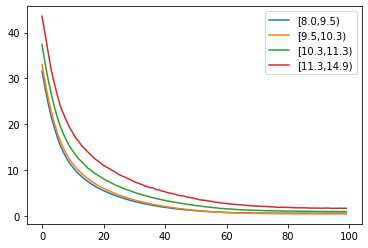

In [40]:
# plt.plot(history.history['loss'])
for k in [k for k in history.history if 'val_ca1' in k]:
    plt.plot(history.history[k], label=k.split('-')[1])
        
plt.legend()
        
plt.show()

In [41]:
%%time
tf.random.set_seed(0)

m = DistMLP('simple_add')
m.compile(
    optimizer='adam',
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[CWMet(ca,(q1,q2),name=f'ca{ca+1}-[{q1},{q2})') for ca,(q1,q2) in product(range(4),zip(quants[:-1],quants[1:]))],
    run_eagerly=True
)


history = m.fit(
    train_dataset,
#     validation_split=0.2,
    epochs=100,
    validation_data=test_dataset
)

# with open(os.path.join(fp_local,'no_sharing.pickle'), 'wb') as handle:
#     pickle.dump(history.history, handle, protocol=pickle.HIGHEST_PROTOCOL)

Epoch 1/100
9/9 [==============================] - 1s 110ms/step - ca1-[8.0,9.5): 35.6904 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 25.3185 - ca2-[9.5,10.3): 26.3804 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 27.2245 - ca3-[10.3,11.3): 30.1466 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 34.5000 - ca4-[11.3,14.9): 36.9954 - val_ca1-[8.0,9.5): 33.2270 - val_ca1-[9.5,10.3): 34.7483 - val_ca1-[10.3,11.3): 39.3296 - val_ca1-[11.3,14.9): 45.9615 - val_ca2-[8.0,9.5): 23.8998 - val_ca2-[9.5,10.3): 25.1155 - val_ca2-[10.3,11.3): 29.0716 - val_ca2-[11.3,14.9): 34.7905 - val_ca3-[8.0,9.5): 22.7976 - val_ca3-[9.5,10.3): 24.0016 - val_ca3-[10.3,11.3): 27.8705 - val_ca3-[11.3,14.9): 33.4531 - val_ca4-[8.0,9.5): 24.2358 - val_ca4-[9.5,10.3): 25.4950 - val_ca4-[10.3,11.3): 29.4443 - val_ca4-[11.3,14.9): 35.1441
Epoc

9/9 [==============================] - 1s 110ms/step - ca1-[8.0,9.5): 19.2012 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 13.0288 - ca2-[9.5,10.3): 13.8963 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 11.5293 - ca3-[10.3,11.3): 13.7615 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 19.9759 - ca4-[11.3,14.9): 22.0831 - val_ca1-[8.0,9.5): 17.6626 - val_ca1-[9.5,10.3): 18.7538 - val_ca1-[10.3,11.3): 22.1672 - val_ca1-[11.3,14.9): 27.2180 - val_ca2-[8.0,9.5): 12.2416 - val_ca2-[9.5,10.3): 13.1037 - val_ca2-[10.3,11.3): 16.0066 - val_ca2-[11.3,14.9): 20.3002 - val_ca3-[8.0,9.5): 9.3506 - val_ca3-[9.5,10.3): 10.0706 - val_ca3-[10.3,11.3): 12.6326 - val_ca3-[11.3,14.9): 16.4498 - val_ca4-[8.0,9.5): 13.0449 - val_ca4-[9.5,10.3): 13.9185 - val_ca4-[10.3,11.3): 16.8864 - val_ca4-[11.3,14.9): 21.2950
Epoch 10/100
9/9 

9/9 [==============================] - 1s 113ms/step - ca1-[8.0,9.5): 10.7670 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 5.3984 - ca2-[9.5,10.3): 5.9486 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 4.6698 - ca3-[10.3,11.3): 6.1202 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 11.4806 - ca4-[11.3,14.9): 13.3422 - val_ca1-[8.0,9.5): 9.9497 - val_ca1-[9.5,10.3): 10.7509 - val_ca1-[10.3,11.3): 13.4344 - val_ca1-[11.3,14.9): 17.3282 - val_ca2-[8.0,9.5): 5.0008 - val_ca2-[9.5,10.3): 5.4887 - val_ca2-[10.3,11.3): 7.4864 - val_ca2-[11.3,14.9): 10.3955 - val_ca3-[8.0,9.5): 3.4596 - val_ca3-[9.5,10.3): 3.8228 - val_ca3-[10.3,11.3): 5.5198 - val_ca3-[11.3,14.9): 8.0081 - val_ca4-[8.0,9.5): 6.6407 - val_ca4-[9.5,10.3): 7.2221 - val_ca4-[10.3,11.3): 9.4548 - val_ca4-[11.3,14.9): 12.7194
Epoch 18/100
9/9 [=============

9/9 [==============================] - 1s 111ms/step - ca1-[8.0,9.5): 6.0884 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 1.8856 - ca2-[9.5,10.3): 2.2010 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 1.7966 - ca3-[10.3,11.3): 2.6242 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 6.3939 - ca4-[11.3,14.9): 7.5767 - val_ca1-[8.0,9.5): 5.5727 - val_ca1-[9.5,10.3): 6.1173 - val_ca1-[10.3,11.3): 8.2653 - val_ca1-[11.3,14.9): 11.2971 - val_ca2-[8.0,9.5): 1.7953 - val_ca2-[9.5,10.3): 1.9893 - val_ca2-[10.3,11.3): 3.3224 - val_ca2-[11.3,14.9): 5.1973 - val_ca3-[8.0,9.5): 1.2009 - val_ca3-[9.5,10.3): 1.2979 - val_ca3-[10.3,11.3): 2.3992 - val_ca3-[11.3,14.9): 3.9515 - val_ca4-[8.0,9.5): 3.0071 - val_ca4-[9.5,10.3): 3.3219 - val_ca4-[10.3,11.3): 4.9595 - val_ca4-[11.3,14.9): 7.2882
Epoch 26/100
9/9 [====================

9/9 [==============================] - 1s 109ms/step - ca1-[8.0,9.5): 3.4698 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.6524 - ca2-[9.5,10.3): 0.8820 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.7225 - ca3-[10.3,11.3): 1.2585 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 3.5580 - ca4-[11.3,14.9): 4.3748 - val_ca1-[8.0,9.5): 3.1843 - val_ca1-[9.5,10.3): 3.5335 - val_ca1-[10.3,11.3): 5.2206 - val_ca1-[11.3,14.9): 7.5038 - val_ca2-[8.0,9.5): 0.7595 - val_ca2-[9.5,10.3): 0.7509 - val_ca2-[10.3,11.3): 1.5973 - val_ca2-[11.3,14.9): 2.7183 - val_ca3-[8.0,9.5): 0.6010 - val_ca3-[9.5,10.3): 0.5098 - val_ca3-[10.3,11.3): 1.1617 - val_ca3-[11.3,14.9): 2.0174 - val_ca4-[8.0,9.5): 1.3528 - val_ca4-[9.5,10.3): 1.4676 - val_ca4-[10.3,11.3): 2.6169 - val_ca4-[11.3,14.9): 4.1706
Epoch 34/100
9/9 [=====================

9/9 [==============================] - 1s 109ms/step - ca1-[8.0,9.5): 2.0872 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3463 - ca2-[9.5,10.3): 0.5294 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.4892 - ca3-[10.3,11.3): 0.8001 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 2.0098 - ca4-[11.3,14.9): 2.7062 - val_ca1-[8.0,9.5): 1.9507 - val_ca1-[9.5,10.3): 2.1617 - val_ca1-[10.3,11.3): 3.5308 - val_ca1-[11.3,14.9): 5.4364 - val_ca2-[8.0,9.5): 0.5745 - val_ca2-[9.5,10.3): 0.4366 - val_ca2-[10.3,11.3): 0.9777 - val_ca2-[11.3,14.9): 1.7025 - val_ca3-[8.0,9.5): 0.6494 - val_ca3-[9.5,10.3): 0.4290 - val_ca3-[10.3,11.3): 0.7791 - val_ca3-[11.3,14.9): 1.2348 - val_ca4-[8.0,9.5): 0.7311 - val_ca4-[9.5,10.3): 0.7028 - val_ca4-[10.3,11.3): 1.5104 - val_ca4-[11.3,14.9): 2.6262
Epoch 42/100
9/9 [=====================

9/9 [==============================] - 1s 111ms/step - ca1-[8.0,9.5): 1.4292 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3991 - ca2-[9.5,10.3): 0.5118 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5547 - ca3-[10.3,11.3): 0.6980 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 1.3273 - ca4-[11.3,14.9): 1.8436 - val_ca1-[8.0,9.5): 1.3329 - val_ca1-[9.5,10.3): 1.4505 - val_ca1-[10.3,11.3): 2.5990 - val_ca1-[11.3,14.9): 4.2447 - val_ca2-[8.0,9.5): 0.6208 - val_ca2-[9.5,10.3): 0.4178 - val_ca2-[10.3,11.3): 0.8042 - val_ca2-[11.3,14.9): 1.3304 - val_ca3-[8.0,9.5): 0.8679 - val_ca3-[9.5,10.3): 0.5652 - val_ca3-[10.3,11.3): 0.7258 - val_ca3-[11.3,14.9): 0.9232 - val_ca4-[8.0,9.5): 0.5808 - val_ca4-[9.5,10.3): 0.4536 - val_ca4-[10.3,11.3): 1.0218 - val_ca4-[11.3,14.9): 1.8201
Epoch 50/100
9/9 [=====================

9/9 [==============================] - 1s 109ms/step - ca1-[8.0,9.5): 1.0487 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.4132 - ca2-[9.5,10.3): 0.5282 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.6123 - ca3-[10.3,11.3): 0.7083 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.9091 - ca4-[11.3,14.9): 1.3653 - val_ca1-[8.0,9.5): 1.0179 - val_ca1-[9.5,10.3): 1.0755 - val_ca1-[10.3,11.3): 2.0960 - val_ca1-[11.3,14.9): 3.5197 - val_ca2-[8.0,9.5): 0.6257 - val_ca2-[9.5,10.3): 0.4181 - val_ca2-[10.3,11.3): 0.8101 - val_ca2-[11.3,14.9): 1.3285 - val_ca3-[8.0,9.5): 0.9879 - val_ca3-[9.5,10.3): 0.6493 - val_ca3-[10.3,11.3): 0.7454 - val_ca3-[11.3,14.9): 0.8432 - val_ca4-[8.0,9.5): 0.6139 - val_ca4-[9.5,10.3): 0.4172 - val_ca4-[10.3,11.3): 0.8267 - val_ca4-[11.3,14.9): 1.3767
Epoch 58/100
9/9 [=====================

9/9 [==============================] - 1s 110ms/step - ca1-[8.0,9.5): 0.8425 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.4020 - ca2-[9.5,10.3): 0.5152 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5172 - ca3-[10.3,11.3): 0.6870 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.7365 - ca4-[11.3,14.9): 1.0976 - val_ca1-[8.0,9.5): 0.8283 - val_ca1-[9.5,10.3): 0.8390 - val_ca1-[10.3,11.3): 1.7491 - val_ca1-[11.3,14.9): 3.0017 - val_ca2-[8.0,9.5): 0.6201 - val_ca2-[9.5,10.3): 0.4148 - val_ca2-[10.3,11.3): 0.8190 - val_ca2-[11.3,14.9): 1.3471 - val_ca3-[8.0,9.5): 0.9074 - val_ca3-[9.5,10.3): 0.5749 - val_ca3-[10.3,11.3): 0.7221 - val_ca3-[11.3,14.9): 0.8890 - val_ca4-[8.0,9.5): 0.7245 - val_ca4-[9.5,10.3): 0.4718 - val_ca4-[10.3,11.3): 0.7499 - val_ca4-[11.3,14.9): 1.0994
Epoch 66/100
9/9 [=====================

9/9 [==============================] - 1s 111ms/step - ca1-[8.0,9.5): 0.6903 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.4057 - ca2-[9.5,10.3): 0.5088 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5249 - ca3-[10.3,11.3): 0.7065 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.5815 - ca4-[11.3,14.9): 0.9180 - val_ca1-[8.0,9.5): 0.7126 - val_ca1-[9.5,10.3): 0.6839 - val_ca1-[10.3,11.3): 1.4963 - val_ca1-[11.3,14.9): 2.5711 - val_ca2-[8.0,9.5): 0.6201 - val_ca2-[9.5,10.3): 0.4134 - val_ca2-[10.3,11.3): 0.8169 - val_ca2-[11.3,14.9): 1.3172 - val_ca3-[8.0,9.5): 0.9200 - val_ca3-[9.5,10.3): 0.5774 - val_ca3-[10.3,11.3): 0.7152 - val_ca3-[11.3,14.9): 0.8524 - val_ca4-[8.0,9.5): 0.8668 - val_ca4-[9.5,10.3): 0.5696 - val_ca4-[10.3,11.3): 0.7346 - val_ca4-[11.3,14.9): 0.9009
Epoch 74/100
9/9 [=====================

9/9 [==============================] - 1s 109ms/step - ca1-[8.0,9.5): 0.6277 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3942 - ca2-[9.5,10.3): 0.5175 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5411 - ca3-[10.3,11.3): 0.6867 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.5806 - ca4-[11.3,14.9): 0.8252 - val_ca1-[8.0,9.5): 0.6477 - val_ca1-[9.5,10.3): 0.5887 - val_ca1-[10.3,11.3): 1.3288 - val_ca1-[11.3,14.9): 2.3115 - val_ca2-[8.0,9.5): 0.6142 - val_ca2-[9.5,10.3): 0.4105 - val_ca2-[10.3,11.3): 0.8220 - val_ca2-[11.3,14.9): 1.3458 - val_ca3-[8.0,9.5): 0.9203 - val_ca3-[9.5,10.3): 0.5756 - val_ca3-[10.3,11.3): 0.7151 - val_ca3-[11.3,14.9): 0.8634 - val_ca4-[8.0,9.5): 1.0057 - val_ca4-[9.5,10.3): 0.6749 - val_ca4-[10.3,11.3): 0.7580 - val_ca4-[11.3,14.9): 0.8208
Epoch 82/100
9/9 [=====================

9/9 [==============================] - 1s 111ms/step - ca1-[8.0,9.5): 0.5672 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3964 - ca2-[9.5,10.3): 0.5035 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5493 - ca3-[10.3,11.3): 0.6827 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.5510 - ca4-[11.3,14.9): 0.7544 - val_ca1-[8.0,9.5): 0.6117 - val_ca1-[9.5,10.3): 0.5287 - val_ca1-[10.3,11.3): 1.2056 - val_ca1-[11.3,14.9): 2.1167 - val_ca2-[8.0,9.5): 0.6092 - val_ca2-[9.5,10.3): 0.4086 - val_ca2-[10.3,11.3): 0.8230 - val_ca2-[11.3,14.9): 1.3548 - val_ca3-[8.0,9.5): 0.9187 - val_ca3-[9.5,10.3): 0.5720 - val_ca3-[10.3,11.3): 0.7138 - val_ca3-[11.3,14.9): 0.8550 - val_ca4-[8.0,9.5): 1.1279 - val_ca4-[9.5,10.3): 0.7719 - val_ca4-[10.3,11.3): 0.7936 - val_ca4-[11.3,14.9): 0.7504
Epoch 90/100
9/9 [=====================

9/9 [==============================] - 1s 112ms/step - ca1-[8.0,9.5): 0.5557 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3897 - ca2-[9.5,10.3): 0.5027 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5431 - ca3-[10.3,11.3): 0.6975 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.5414 - ca4-[11.3,14.9): 0.7284 - val_ca1-[8.0,9.5): 0.5924 - val_ca1-[9.5,10.3): 0.4906 - val_ca1-[10.3,11.3): 1.1275 - val_ca1-[11.3,14.9): 2.0105 - val_ca2-[8.0,9.5): 0.6011 - val_ca2-[9.5,10.3): 0.4061 - val_ca2-[10.3,11.3): 0.8311 - val_ca2-[11.3,14.9): 1.4139 - val_ca3-[8.0,9.5): 0.9189 - val_ca3-[9.5,10.3): 0.5708 - val_ca3-[10.3,11.3): 0.7103 - val_ca3-[11.3,14.9): 0.8883 - val_ca4-[8.0,9.5): 1.2265 - val_ca4-[9.5,10.3): 0.8520 - val_ca4-[10.3,11.3): 0.8264 - val_ca4-[11.3,14.9): 0.7511
Epoch 98/100
9/9 [=====================

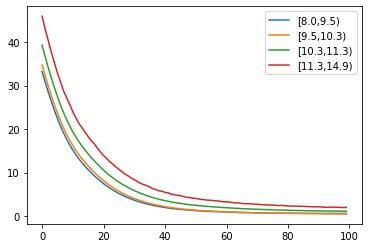

In [42]:
# plt.plot(history.history['loss'])
for k in [k for k in history.history if 'val_ca1' in k]:
    plt.plot(history.history[k], label=k.split('-')[1])
        
plt.legend()
        
plt.show()

In [ ]:
%%time
tf.random.set_seed(0)

m = DistMLP('djgrad')
m.compile(
    optimizer='adam',
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[CWMet(ca,(q1,q2),name=f'ca{ca+1}-[{q1},{q2})') for ca,(q1,q2) in product(range(4),zip(quants[:-1],quants[1:]))],
    run_eagerly=True
)


history = m.fit(
    train_dataset,
#     validation_split=0.2,
    epochs=100,
    validation_data=test_dataset
)

# with open(os.path.join(fp_local,'no_sharing.pickle'), 'wb') as handle:
#     pickle.dump(history.history, handle, protocol=pickle.HIGHEST_PROTOCOL)

Epoch 1/100
9/9 [==============================] - 1s 148ms/step - ca1-[8.0,9.5): 35.2444 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 25.0712 - ca2-[9.5,10.3): 26.0036 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 26.8722 - ca3-[10.3,11.3): 29.7480 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 34.2217 - ca4-[11.3,14.9): 36.6417 - val_ca1-[8.0,9.5): 31.5942 - val_ca1-[9.5,10.3): 33.0582 - val_ca1-[10.3,11.3): 37.4893 - val_ca1-[11.3,14.9): 43.7179 - val_ca2-[8.0,9.5): 22.6136 - val_ca2-[9.5,10.3): 23.7824 - val_ca2-[10.3,11.3): 27.6052 - val_ca2-[11.3,14.9): 32.9674 - val_ca3-[8.0,9.5): 21.5501 - val_ca3-[9.5,10.3): 22.7021 - val_ca3-[10.3,11.3): 26.4489 - val_ca3-[11.3,14.9): 31.6780 - val_ca4-[8.0,9.5): 23.0322 - val_ca4-[9.5,10.3): 24.2372 - val_ca4-[10.3,11.3): 28.0451 - val_ca4-[11.3,14.9): 33.3938
Epoc

9/9 [==============================] - 1s 146ms/step - ca1-[8.0,9.5): 13.7811 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 7.9660 - ca2-[9.5,10.3): 8.5678 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 6.5695 - ca3-[10.3,11.3): 8.2710 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 13.9403 - ca4-[11.3,14.9): 15.7886 - val_ca1-[8.0,9.5): 12.5485 - val_ca1-[9.5,10.3): 13.3975 - val_ca1-[10.3,11.3): 16.3737 - val_ca1-[11.3,14.9): 20.5649 - val_ca2-[8.0,9.5): 7.2623 - val_ca2-[9.5,10.3): 7.8638 - val_ca2-[10.3,11.3): 10.2122 - val_ca2-[11.3,14.9): 13.5272 - val_ca3-[8.0,9.5): 4.8790 - val_ca3-[9.5,10.3): 5.3272 - val_ca3-[10.3,11.3): 7.3115 - val_ca3-[11.3,14.9): 10.1098 - val_ca4-[8.0,9.5): 8.2397 - val_ca4-[9.5,10.3): 8.8883 - val_ca4-[10.3,11.3): 11.3557 - val_ca4-[11.3,14.9): 14.8517
Epoch 10/100
9/9 [=========

9/9 [==============================] - 1s 145ms/step - ca1-[8.0,9.5): 7.5735 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 2.9586 - ca2-[9.5,10.3): 3.4197 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 2.0339 - ca3-[10.3,11.3): 2.9691 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 7.5598 - ca4-[11.3,14.9): 8.4745 - val_ca1-[8.0,9.5): 7.0002 - val_ca1-[9.5,10.3): 7.5857 - val_ca1-[10.3,11.3): 9.9078 - val_ca1-[11.3,14.9): 13.2795 - val_ca2-[8.0,9.5): 2.8380 - val_ca2-[9.5,10.3): 3.1285 - val_ca2-[10.3,11.3): 4.7231 - val_ca2-[11.3,14.9): 7.0270 - val_ca3-[8.0,9.5): 1.4180 - val_ca3-[9.5,10.3): 1.5390 - val_ca3-[10.3,11.3): 2.7188 - val_ca3-[11.3,14.9): 4.4155 - val_ca4-[8.0,9.5): 3.5309 - val_ca4-[9.5,10.3): 3.8823 - val_ca4-[10.3,11.3): 5.6280 - val_ca4-[11.3,14.9): 8.1544
Epoch 18/100
9/9 [====================

9/9 [==============================] - 1s 143ms/step - ca1-[8.0,9.5): 4.7535 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 1.1109 - ca2-[9.5,10.3): 1.3987 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.8768 - ca3-[10.3,11.3): 1.5018 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 3.9991 - ca4-[11.3,14.9): 4.8552 - val_ca1-[8.0,9.5): 4.3971 - val_ca1-[9.5,10.3): 4.8162 - val_ca1-[10.3,11.3): 6.6896 - val_ca1-[11.3,14.9): 9.4333 - val_ca2-[8.0,9.5): 1.1791 - val_ca2-[9.5,10.3): 1.2595 - val_ca2-[10.3,11.3): 2.3221 - val_ca2-[11.3,14.9): 3.8559 - val_ca3-[8.0,9.5): 0.6842 - val_ca3-[9.5,10.3): 0.6349 - val_ca3-[10.3,11.3): 1.3879 - val_ca3-[11.3,14.9): 2.4600 - val_ca4-[8.0,9.5): 1.5422 - val_ca4-[9.5,10.3): 1.6817 - val_ca4-[10.3,11.3): 2.8860 - val_ca4-[11.3,14.9): 4.6318
Epoch 26/100
9/9 [=====================

9/9 [==============================] - 1s 143ms/step - ca1-[8.0,9.5): 3.0824 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.5188 - ca2-[9.5,10.3): 0.7477 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5442 - ca3-[10.3,11.3): 0.9864 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 2.1752 - ca4-[11.3,14.9): 2.8030 - val_ca1-[8.0,9.5): 2.8367 - val_ca1-[9.5,10.3): 3.1260 - val_ca1-[10.3,11.3): 4.7046 - val_ca1-[11.3,14.9): 7.0201 - val_ca2-[8.0,9.5): 0.6943 - val_ca2-[9.5,10.3): 0.6494 - val_ca2-[10.3,11.3): 1.4203 - val_ca2-[11.3,14.9): 2.5286 - val_ca3-[8.0,9.5): 0.5801 - val_ca3-[9.5,10.3): 0.4266 - val_ca3-[10.3,11.3): 0.9355 - val_ca3-[11.3,14.9): 1.6521 - val_ca4-[8.0,9.5): 0.7490 - val_ca4-[9.5,10.3): 0.7248 - val_ca4-[10.3,11.3): 1.5459 - val_ca4-[11.3,14.9): 2.7295
Epoch 34/100
9/9 [=====================

9/9 [==============================] - 1s 152ms/step - ca1-[8.0,9.5): 2.0320 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3878 - ca2-[9.5,10.3): 0.5705 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.4930 - ca3-[10.3,11.3): 0.7950 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 1.0842 - ca4-[11.3,14.9): 1.6890 - val_ca1-[8.0,9.5): 1.8636 - val_ca1-[9.5,10.3): 2.0467 - val_ca1-[10.3,11.3): 3.3933 - val_ca1-[11.3,14.9): 5.2729 - val_ca2-[8.0,9.5): 0.5891 - val_ca2-[9.5,10.3): 0.4758 - val_ca2-[10.3,11.3): 1.0874 - val_ca2-[11.3,14.9): 1.9242 - val_ca3-[8.0,9.5): 0.6443 - val_ca3-[9.5,10.3): 0.4279 - val_ca3-[10.3,11.3): 0.7838 - val_ca3-[11.3,14.9): 1.2581 - val_ca4-[8.0,9.5): 0.5794 - val_ca4-[9.5,10.3): 0.4291 - val_ca4-[10.3,11.3): 0.9491 - val_ca4-[11.3,14.9): 1.6562
Epoch 42/100
9/9 [=====================

9/9 [==============================] - 1s 144ms/step - ca1-[8.0,9.5): 1.3346 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3819 - ca2-[9.5,10.3): 0.5262 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5140 - ca3-[10.3,11.3): 0.7417 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.6817 - ca4-[11.3,14.9): 1.1076 - val_ca1-[8.0,9.5): 1.2490 - val_ca1-[9.5,10.3): 1.3416 - val_ca1-[10.3,11.3): 2.4572 - val_ca1-[11.3,14.9): 4.0325 - val_ca2-[8.0,9.5): 0.5789 - val_ca2-[9.5,10.3): 0.4316 - val_ca2-[10.3,11.3): 0.9618 - val_ca2-[11.3,14.9): 1.6917 - val_ca3-[8.0,9.5): 0.7265 - val_ca3-[9.5,10.3): 0.4732 - val_ca3-[10.3,11.3): 0.7452 - val_ca3-[11.3,14.9): 1.1020 - val_ca4-[8.0,9.5): 0.7029 - val_ca4-[9.5,10.3): 0.4588 - val_ca4-[10.3,11.3): 0.7532 - val_ca4-[11.3,14.9): 1.1424
Epoch 50/100
9/9 [=====================

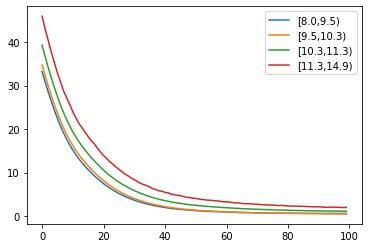

In [42]:
# plt.plot(history.history['loss'])
for k in [k for k in history.history if 'val_ca1' in k]:
    plt.plot(history.history[k], label=k.split('-')[1])
        
plt.legend()
        
plt.show()